# Imports

In [56]:
from bs4 import BeautifulSoup
import lxml.etree as ET
import requests
import random
import pandas as pd
import numpy as np

# Web Scraping

In [2]:
HEADERS = {
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:98.0) Gecko/20100101 Firefox/98.0",
        "Accept": "text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,*/*;q=0.8",
        "Accept-Language": "en-US,en;q=0.5",
        "Accept-Encoding": "gzip, deflate",
        "Connection": "keep-alive",
        "Upgrade-Insecure-Requests": "1",
        "Sec-Fetch-Dest": "document",
        "Sec-Fetch-Mode": "navigate",
        "Sec-Fetch-Site": "none",
        "Sec-Fetch-User": "?1",
        "Cache-Control": "max-age=0",
    }

url = "https://www.ebay.co.uk/fdbk/feedback_profile/musicmagpieshop?filter=feedback_page%3ARECEIVED_AS_SELLER&q=294793039103&sort=TIME"

page = requests.get(url, headers=HEADERS)
soup = BeautifulSoup(page.text, "lxml")

In [3]:
table = soup.find("table", {"id": "feedback-cards"})

In [4]:
table_body = table.find("tbody")

In [5]:
df = pd.DataFrame(columns=["Feedback", "Rating"])

In [6]:
for row in table_body:
    text = row.find("div", class_ = "card__comment")
    comment = text.span.attrs["aria-label"].strip()
    rating = row.find("div", class_ = "card__rating").svg.attrs["aria-label"]
    df.loc[len(df)] = [comment, rating] 


In [7]:
df

,Feedback,Rating
0,Item received as described and in a timely man...,Positive feedback rating
1,Turned up as described,Positive feedback rating
2,But skeptical buying “good” condition items ha...,Positive feedback rating
3,as described,Positive feedback rating
4,Item arrived quickly and was as described.,Positive feedback rating
5,Thanks,Positive feedback rating
6,Brilliant service and quality item as always A...,Positive feedback rating
7,"True description, prompt delivery, good commun...",Positive feedback rating
8,Excellent seller,Positive feedback rating
9,As described thanks,Positive feedback rating


# Utilising NLTK for sentiment analysis

In [8]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\mibai\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [9]:
sia = SentimentIntensityAnalyzer()

In [10]:
def polarity_score(x):
    all_scores = sia.polarity_scores(x)
    return all_scores["compound"]

df["polarity_score"] = df["Feedback"].apply(polarity_score)

# Lambda function
# df["polarity_score"] = df["Feedback"].apply(lambda x: sia.polarity_scores(x)["compound"])

In [12]:
# Positive sentiment: Compound score > 0.05
# Neutral sentiment: -0.05 <= Compound score <= 0.05
# Negative sentiment: Compound score < -0.05

df["nltk_rating"] = df["polarity_score"].apply(lambda x: "Positive" if x > 0.05 else ("Neutral" if -0.05 <= x <= 0.05 else "Negative"))

In [18]:
df.rename(columns={"Rating": "rating", "Feedback": "feedback"}, inplace=True)

In [28]:
df["rating"]  =df["rating"].apply(lambda x: x.split()[0])

In [29]:
df

,feedback,rating,polarity_score,nltk_rating
0,Item received as described and in a timely man...,Positive,0.0000,Neutral
1,Turned up as described,Positive,0.0000,Neutral
2,But skeptical buying “good” condition items ha...,Positive,0.9655,Positive
3,as described,Positive,0.0000,Neutral
4,Item arrived quickly and was as described.,Positive,0.0000,Neutral
5,Thanks,Positive,0.4404,Positive
6,Brilliant service and quality item as always A...,Positive,0.5859,Positive
7,"True description, prompt delivery, good commun...",Positive,0.6908,Positive
8,Excellent seller,Positive,0.5719,Positive
9,As described thanks,Positive,0.4404,Positive


In [39]:
rating_counts = df["rating"].value_counts().sort_index()
nltk_rating_counts = df["nltk_rating"].value_counts().sort_index()

In [46]:
rating_counts

rating
Neutral      1
Positive    24
Name: count, dtype: int64

In [47]:
nltk_rating_counts

nltk_rating
Neutral      7
Positive    18
Name: count, dtype: int64

In [60]:
df["match"] = np.where((df["rating"] == df["nltk_rating"]), "Match", "No Match")

In [70]:
match_counts = df["match"].value_counts().sort_index()
match_counts

match
Match       19
No Match     6
Name: count, dtype: int64

# Plotting the results

In [30]:
import matplotlib.pyplot as plt

In [31]:
%matplotlib inline

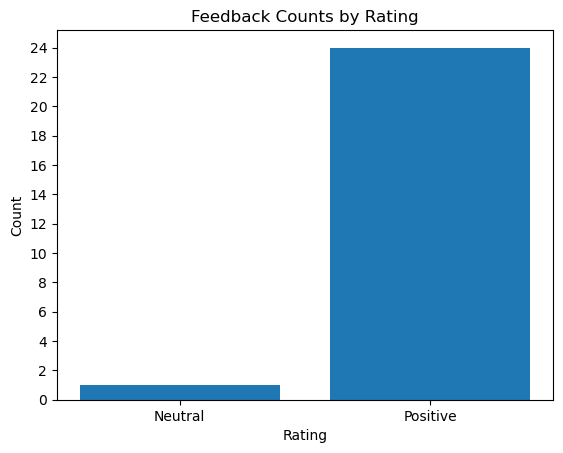

In [51]:
plt.bar(rating_counts.index, rating_counts.values)
plt.yticks(range(0, max(rating_counts.values) + 1, 2))
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Feedback Counts by Rating')
plt.show()

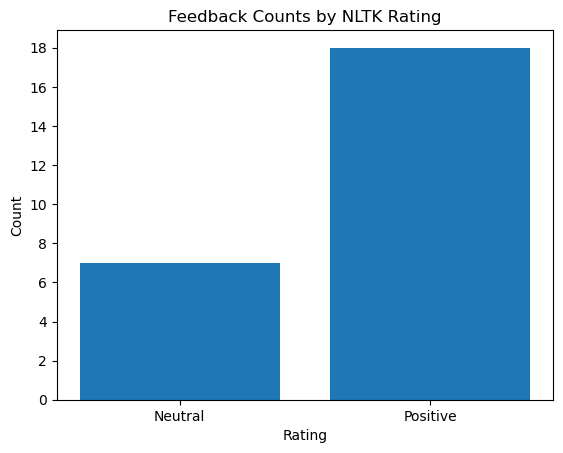

In [50]:
plt.bar(nltk_rating_counts.index, nltk_rating_counts.values)
plt.yticks(range(0, max(nltk_rating_counts.values) + 1, 2))
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Feedback Counts by NLTK Rating')
plt.show()

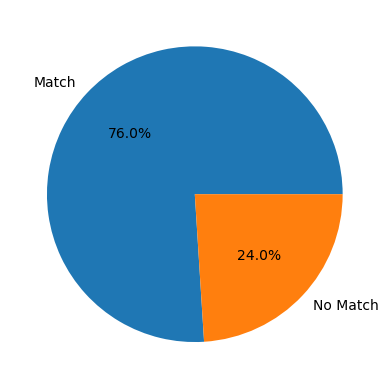

In [75]:
plt.pie(match_counts.values, labels = match_counts.index, autopct = '%1.1f%%')
plt.show()